In [ ]:
import pandas as pd

# List of CSV files
csv_files = ['geometries.csv', 'simulations.csv', 'locations.csv', 'location_ratings.csv']

# Iterate through each CSV file
for file in csv_files:
    print(f"\nColumns Overview for {file}:\n{'='*40}")

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Display columns information
    columns_info = df.dtypes.rename("Data Type").to_frame().join(df.nunique().rename("Unique Values"))
    columns_info["Null Values"] = df.isnull().sum()
    columns_info["Top Value"] = df.mode().iloc[0]

    print(columns_info)



Columns Overview for geometries.csv:
               Data Type  Unique Values  Null Values  \
apartment_id      object          45175       588501   
site_id            int64           1466            0   
building_id        int64           3184            0   
plan_id            int64           8941            0   
floor_id           int64          13905            0   
unit_id          float64          47284       588501   
area_id          float64         315036      2415749   
unit_usage        object              5            0   
entity_type       object              4            0   
entity_subtype    object             91            0   
geometry          object        1756627            0   
elevation        float64            784            0   
height           float64            188            0   

                                                        Top Value  
apartment_id                     d41d8cd98f00b204e9800998ecf8427e  
site_id                                  

In [ ]:
import pandas as pd
geometries = pd.read_csv('geometries.csv')
location_ratings = pd.read_csv('location_ratings.csv')
locations = pd.read_csv('locations.csv')
simulations = pd.read_csv('simulations.csv')


In [ ]:
# prompt: Using dataframe df: generate code that would preprocess the dataset and Handle any missing values or outliers.
df.fillna(df.mean(), inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.columns)



Index(['building_id', 'location_rating_MIKRAT_W', 'location_rating_IMAGE_W',
       'location_rating_FZ_W', 'location_rating_DL_W',
       'location_rating_NASE_W_DOM', 'location_rating_FGFRQZ'],
      dtype='object')


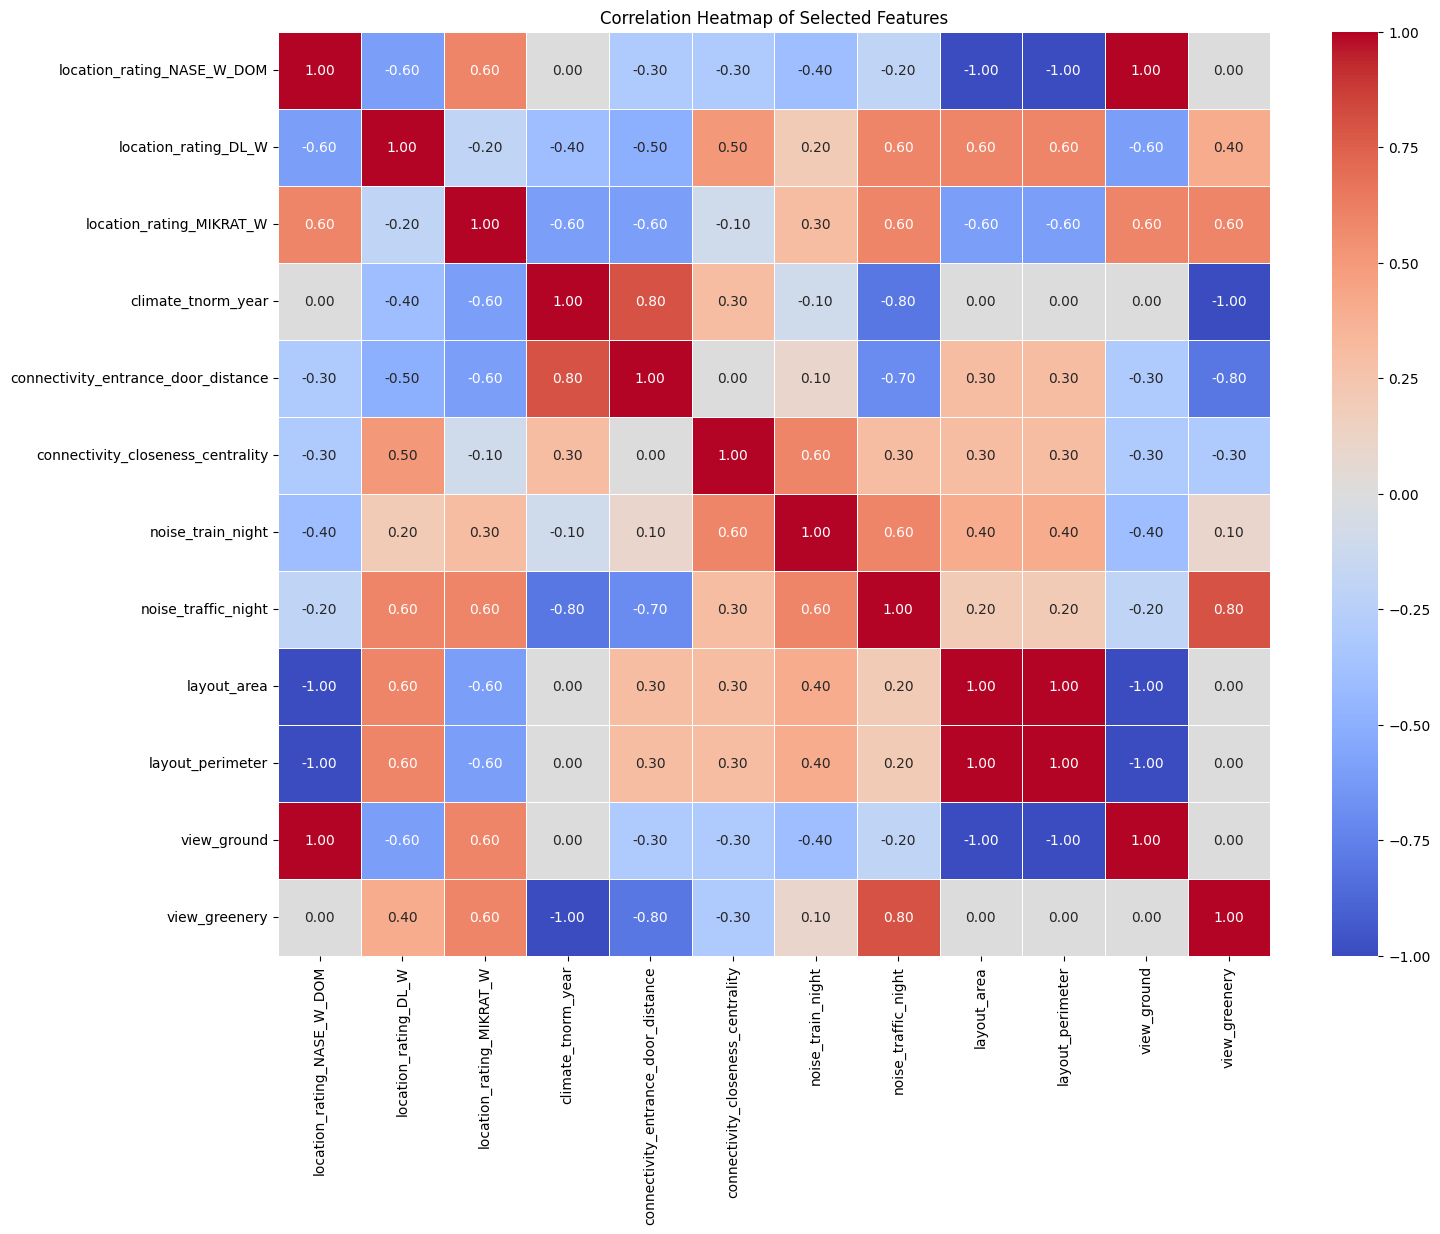

In [ ]:
data = {
    'location_rating_NASE_W_DOM': [5, 4, 3, 2, 1],
    'location_rating_DL_W': [3, 2, 1, 4, 5],
    'location_rating_MIKRAT_W': [4, 5, 2, 1, 3],
    'climate_tnorm_year': [2, 3, 4, 5, 1],
    'connectivity_entrance_door_distance': [1, 3, 5, 4, 2],
    'connectivity_closeness_centrality': [2, 4, 1, 5, 3],
    'noise_train_night': [1, 5, 2, 3, 4],
    'noise_traffic_night': [3, 4, 1, 2, 5],
    'layout_area': [40, 50, 60, 70, 80],
    'layout_perimeter': [30, 40, 50, 60, 70],
    'view_ground': [5, 4, 3, 2, 1],
    'view_greenery': [4, 3, 2, 1, 5],
}

df = pd.DataFrame(data)

# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()


In [ ]:
import pandas as pd
location_ratings = pd.read_csv('location_ratings.csv')
locations = pd.read_csv('locations.csv')
simulations = pd.read_csv('simulations.csv')

In [ ]:
merged_data = pd.merge(simulations, location_ratings, on='building_id', how='inner')
merged_data = pd.merge(merged_data, locations, on='building_id', how='inner')

In [5]:
merged_data['total_area'] = merged_data['layout_area'] + merged_data['layout_net_area']
df1 = pd.DataFrame(merged_data)

In [8]:
df1.fillna(0, inplace=True)

In [9]:
# prompt: Using dataframe df: generate code that uses the Gradient Boosting Classifier model precisely the XGBClassifier to predict location_rating_NASE_W_DOM. with the following as predictor variables "'walkshed_shop_supermarket', 'walkshed_amenity_bicycle_parking', 'walkshed_amenity_bicycle_repair_station', 'walkshed_amenity_cafe', 'walkshed_amenity_car_wash', 'walkshed_amenity_childcare', 'walkshed_amenity_community_centre', 'walkshed_amenity_drinking_water', 'walkshed_amenity_kindergarten', 'walkshed_amenity_parking', 'walkshed_amenity_post_box', 'walkshed_amenity_public_bookcase', 'walkshed_amenity_recycling',  'walkshed_amenity_restaurant', 'walkshed_amenity_school',  'walkshed_amenity_social_facility', 'walkshed_amenity_telephone', 'walkshed_amenity_toilets',  'walkshed_amenity_veterinary', 'walkshed_amenity_waste_basket', 'walkshed_tourism_artwork', 'walkshed_tourism_information', 'walkshed_tourism_viewpoint', 'walkshed_leisure_garden', 'walkshed_leisure_picnic_table', 'walkshed_leisure_pitch', 'walkshed_leisure_playground', 'walkshed_leisure_sports_centre', 'walkshed_leisure_swimming_pool', 'walkshed_amenity_atm', 'walkshed_amenity_bank', 'walkshed_amenity_bar', 'walkshed_amenity_bureau_de_change', 'walkshed_amenity_charging_station', 'walkshed_amenity_college','walkshed_amenity_congress_center', 'walkshed_amenity_dentist', 'walkshed_amenity_doctors', 'walkshed_amenity_driving_school','walkshed_amenity_ferry_terminal',  'walkshed_amenity_fountain', 'walkshed_amenity_fuel', 'walkshed_amenity_ice_cream', 'walkshed_amenity_language_school', 'walkshed_amenity_library',  'walkshed_amenity_music_school', 'walkshed_amenity_pharmacy', 'walkshed_amenity_police','view_buildings_mean','view_greenery_mean', 'view_isovist_mean', 'view_highways_mean','view_pedestrians_mean', 'noise_traffic_day', 'noise_traffic_night', 'window_noise_traffic_day_max','window_noise_traffic_night_max','connectivity_eigen_centrality_mean','connectivity_entrance_door_distance_mean','connectivity_betweenness_centrality_mean','connectivity_closeness_centrality_mean', 'connectivity_room_distance_mean','connectivity_living_dining_distance_mean','connectivity_bathroom_distance_mean','connectivity_kitchen_distance_mean','connectivity_balcony_distance_mean','connectivity_loggia_distance_mean', 'total_area'"

from sklearn.model_selection import train_test_split
#from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df.drop('location_rating_NASE_W_DOM', axis=1), df['location_rating_NASE_W_DOM'], test_size=0.25)

# Select predictor variables
selected_features = ['walkshed_shop_supermarket', 'walkshed_amenity_bicycle_parking', 'walkshed_amenity_bicycle_repair_station', 'walkshed_amenity_cafe', 'walkshed_amenity_car_wash', 'walkshed_amenity_childcare', 'walkshed_amenity_community_centre', 'walkshed_amenity_drinking_water', 'walkshed_amenity_kindergarten', 'walkshed_amenity_parking', 'walkshed_amenity_post_box', 'walkshed_amenity_public_bookcase', 'walkshed_amenity_recycling', 'walkshed_amenity_restaurant', 'walkshed_amenity_school', 'walkshed_amenity_social_facility', 'walkshed_amenity_telephone', 'walkshed_amenity_toilets', 'walkshed_amenity_veterinary', 'walkshed_amenity_waste_basket', 'walkshed_tourism_artwork', 'walkshed_tourism_information', 'walkshed_tourism_viewpoint', 'walkshed_leisure_garden', 'walkshed_leisure_picnic_table', 'walkshed_leisure_pitch', 'walkshed_leisure_playground', 'walkshed_leisure_sports_centre', 'walkshed_leisure_swimming_pool', 'walkshed_amenity_atm', 'walkshed_amenity_bank', 'walkshed_amenity_bar', 'walkshed_amenity_bureau_de_change', 'walkshed_amenity_charging_station', 'walkshed_amenity_college','walkshed_amenity_congress_center', 'walkshed_amenity_dentist', 'walkshed_amenity_doctors', 'walkshed_amenity_driving_school','walkshed_amenity_ferry_terminal', 'walkshed_amenity_fountain', 'walkshed_amenity_fuel', 'walkshed_amenity_ice_cream', 'walkshed_amenity_language_school', 'walkshed_amenity_library', 'walkshed_amenity_music_school', 'walkshed_amenity_pharmacy', 'walkshed_amenity_police','view_buildings_mean','view_greenery_mean', 'view_isovist_mean', 'view_highways_mean','view_pedestrians_mean', 'noise_traffic_day', 'noise_traffic_night', 'window_noise_traffic_day_max','window_noise_traffic_night_max','connectivity_eigen_centrality_mean','connectivity_entrance_door_distance_mean','connectivity_betweenness_centrality_mean','connectivity_closeness_centrality_mean', 'connectivity_room_distance_mean','connectivity_living_dining_distance_mean','connectivity_bathroom_distance_mean','connectivity_kitchen_distance_mean','connectivity_balcony_distance_mean','connectivity_loggia_distance_mean', 'total_area']

# Select the target variable
#target_variable = 'location_rating_NASE_W_DOM'

# Create the feature matrix (X) and target vector (y)
X = df1[selected_features]
y = df1['location_rating_NASE_W_DOM']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Create the Gradient Boosting Classifier model
model = XGBClassifier()

#print("Unique values in y_train:", y_train.unique())

# Train the model on
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2036
         1.0       0.99      0.99      0.99      9499
         2.0       0.98      0.98      0.98      7199
         3.0       1.00      0.99      1.00     11640
         4.0       0.98      0.98      0.98      2829
         5.0       0.99      1.00      0.99      5133
         6.0       0.99      0.99      0.99      5964
         7.0       0.98      0.98      0.98      2285
         8.0       0.99      0.99      0.99      3976
         9.0       0.99      1.00      1.00     33878

    accuracy                           0.99     84439
   macro avg       0.99      0.99      0.99     84439
weighted avg       0.99      0.99      0.99     84439

Confusion Matrix:
 [[ 2036     0     0     0     0     0     0     0     0     0]
 [    0  9361    74    15     4     1    12     7     0    25]
 [    0    24  7091     0     8     0     2     0     0  